## Loan Approval Prediction using Machine Learning
#### Download the used data by visiting Kaggle.

In [235]:
# Importing Libraries and Dataset
# Pandas – To load the Dataframe
# Matplotlib – To visualize the data features

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [236]:
# pip install seaborn


In [237]:

train=pd.read_csv(r'C:\Users\Mathur\Desktop\AISHU\STUDY\Data Analytics\ML_Loan\train.csv')

train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})
train.head()
# data cleaning
train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Data Preprocessing and Visualization

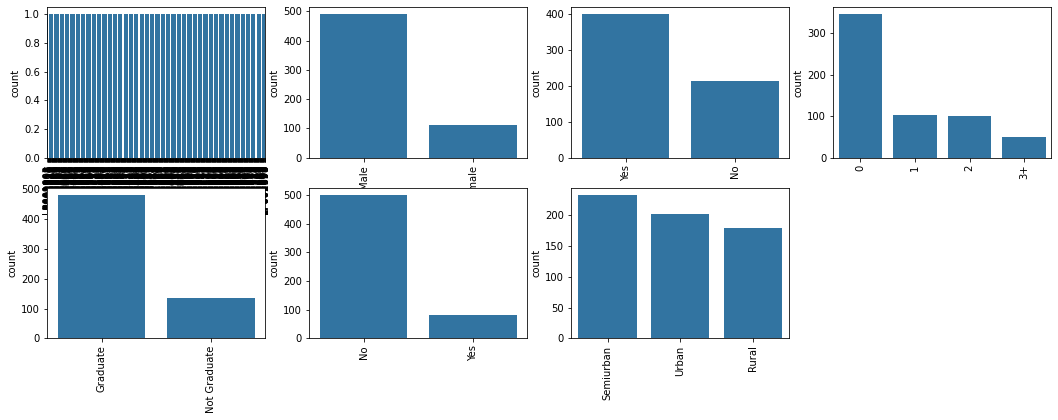

In [238]:
obj = (train.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

for col in object_cols: 
  y = train[col].value_counts() 
  plt.subplot(11,4,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y) 
  index +=1

### Splitting Dataset into train & test

In [239]:

# from sklearn.model_selection import train_test_split 
  
# X = data.drop(['Loan_Status'],axis=1) 
# Y = data['Loan_Status'] 
# X.shape,Y.shape 
  
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
#                                                     test_size=0.4, 
#                                                     random_state=1) 
# X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

In [240]:
train.shape

(614, 13)

In [241]:

test=pd.read_csv(r'C:\Users\Mathur\Desktop\AISHU\STUDY\Data Analytics\ML_Loan\test.csv')
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [242]:
# train.describe()
# train.columns
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

## Data visualisation: Exploratory Data analysis

<Axes: xlabel='Loan_Status'>

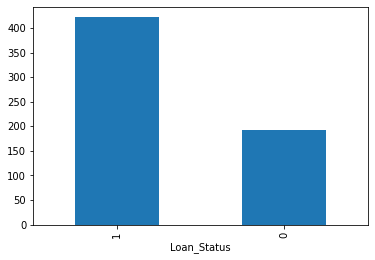

In [243]:
train['Loan_Status'].value_counts().plot.bar()

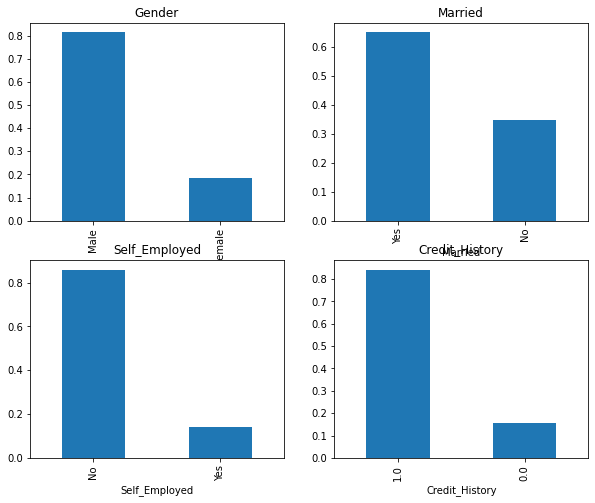

In [244]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize = (10,8), title = 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize = (10,8), title = 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize = (10,8), title = 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize = (10,8), title = 'Credit_History')
plt.show()

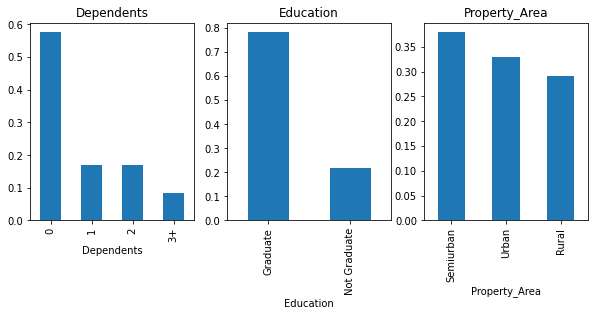

In [245]:
plt.figure(1)
plt.subplot(231)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize = (10,8), title = 'Dependents')
plt.subplot(232)
train['Education'].value_counts(normalize=True).plot.bar(figsize = (10,8), title = 'Education')
plt.subplot(233)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize = (10,8), title = 'Property_Area')
plt.show()

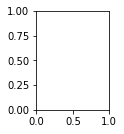

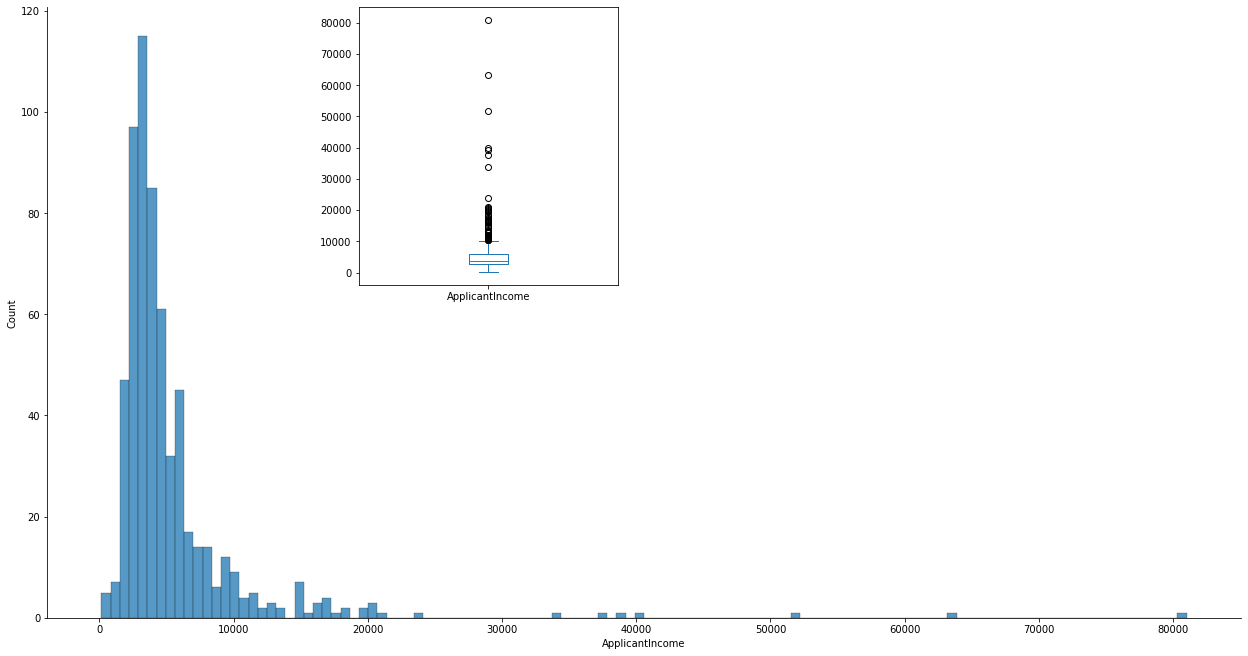

In [246]:
plt.figure(1)
plt.subplot(241)
sns.displot(train['ApplicantIncome'])
plt.subplot(242)
train['ApplicantIncome'].plot.box(figsize = (20,10))
plt.show()

#### Co-applicant income visualisation

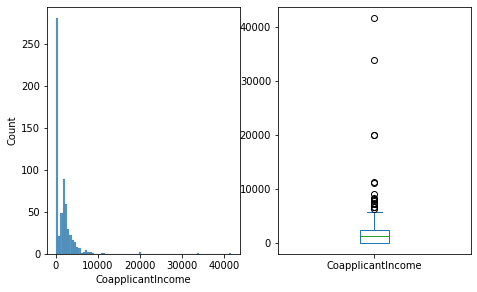

In [247]:
plt.figure(1)
plt.subplot(251)
sns.histplot(train['CoapplicantIncome'])
plt.subplot(252)
train['CoapplicantIncome'].plot.box(figsize = (20,10))
plt.show()

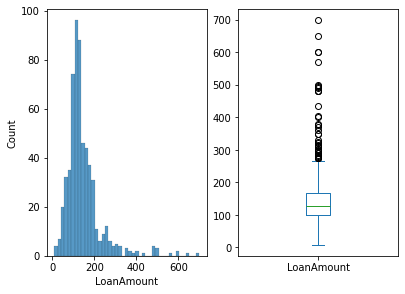

In [248]:
plt.figure(1)
plt.subplot(261)
sns.histplot(train['LoanAmount'])
plt.subplot(262)
train['LoanAmount'].plot.box(figsize = (20,10))
plt.show()

In [249]:
# Get the number of columns of object datatype.

obj = (train.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


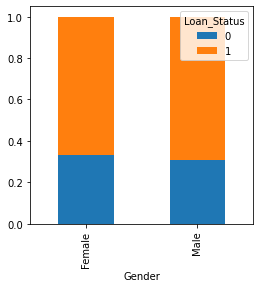

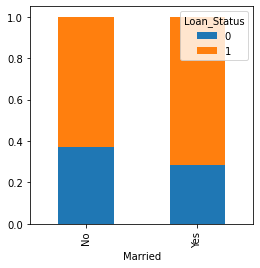

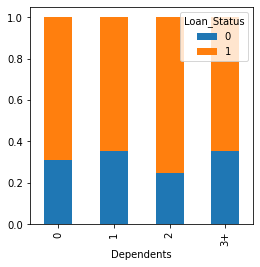

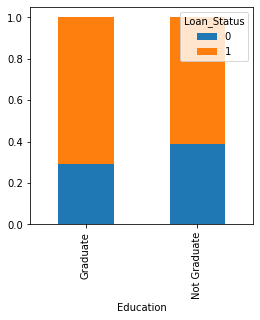

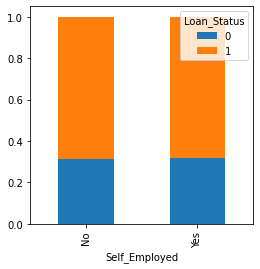

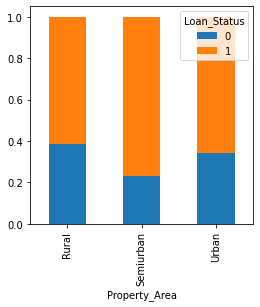

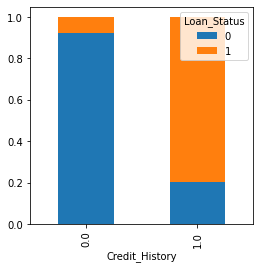

In [250]:
#categorical data: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.show()

Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.show()

Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.show()

Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.show()

Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.show()

Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.show()

Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.show()

### Numerical Data


<Axes: xlabel='Loan_Status'>

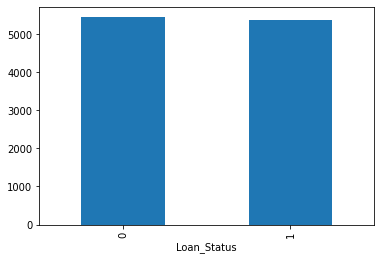

In [251]:
#numerical: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

## Identifying patterns or trends in data using visualisation of [ correlation between features]

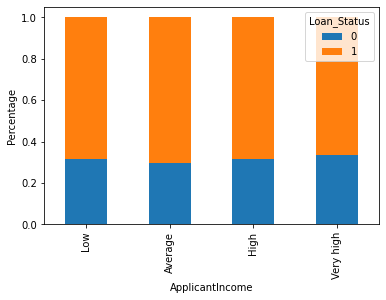

In [252]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very high']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels = group)
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis = 0).plot(kind ='bar',stacked = True) 
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

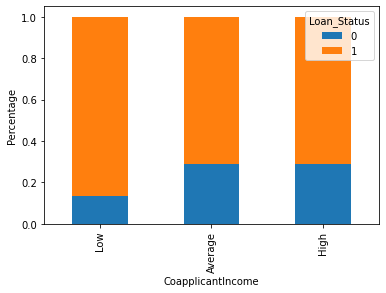

In [253]:
bins=[0,1000,2000,41000] 
group=['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels = group)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis = 0).plot(kind ='bar',stacked = True) 
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.show()

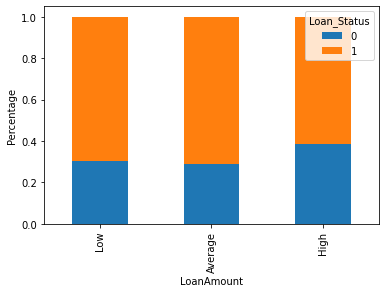

In [254]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins, labels = group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis = 0).plot(kind ='bar',stacked = True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

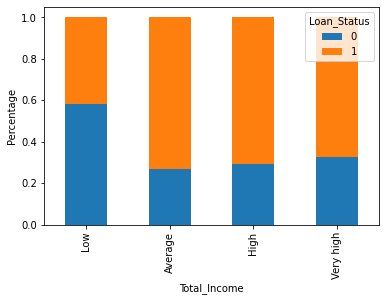

In [255]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels = group)
TotalIncome_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
TotalIncome_bin.div(TotalIncome_bin.sum(1).astype(float),axis = 0).plot(kind ='bar',stacked = True) 
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

In [257]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,LoanAmount_bin,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,High,NaN,NaN,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,High,Average,Average,6091.0,Very high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,Average,NaN,Low,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,Average,High,Average,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,High,NaN,Average,6000.0,High


In [258]:
train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income','Total_Income_bin'], axis=1)

In [259]:
# train.head(90)
# train['Loan_Status'].unique()
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

## Data preprocessing/preparation: prepare the information for analysis

In [260]:
# train['Dependents'].replace('3+',3,inplace = True)
# test['Dependents'].replace('3+',3,inplace = True)
# train['Loan_Status'].replace('N',0,inplace = True)
# train['Loan_Status'].replace('Y',1,inplace = True)

In [261]:
# matrix = train.corr()
# f,ax = plt.subplots(figsize =(9,6))
# # sns.heatmap(matrix,vmax = .8,square= True, cmap='BuPu')
# plt.show()

In [262]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Fixing data for missing values
#### Categorical missing: Gender, Married, Dependents, Self_Employed, Property_Area, Loan_Status
#### Numerical missing: LoanAmount, Loan_Amount_Term, Credit_History


In [265]:
train['Gender']= train['Gender'].fillna(train['Gender'].mode()[0])


train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

In [266]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [267]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)

<Axes: >

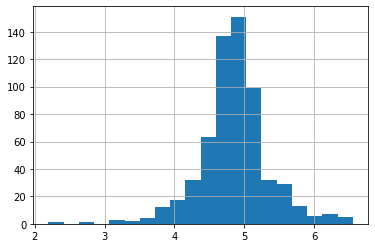

In [268]:
# To remove the skewness due to outliers, we use log transformation to get a normal distribution.
train['LoanAmount_log']= np.log(train['LoanAmount'])
test['LoanAmount_log']= np.log(test['LoanAmount'])
train['LoanAmount_log'].hist(bins = 20)

In [269]:
train['Total_Income']= train['ApplicantIncome']+ train['CoapplicantIncome']
test['Total_Income']= test['ApplicantIncome']+ test['CoapplicantIncome']

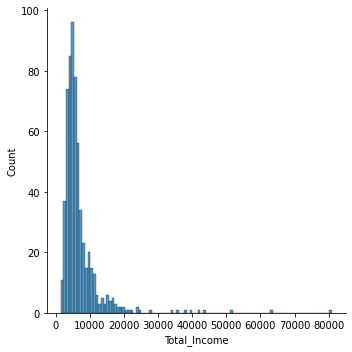

In [270]:
sns.displot(train['Total_Income'])

<Axes: xlabel='Total_Income_log', ylabel='Count'>

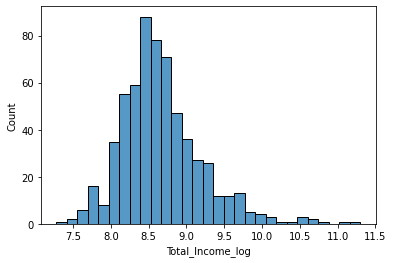

In [271]:
train['Total_Income_log']=np.log(train['Total_Income'])
test['Total_Income_log']=np.log(test['Total_Income'])
sns.histplot(train['Total_Income_log'])

In [272]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

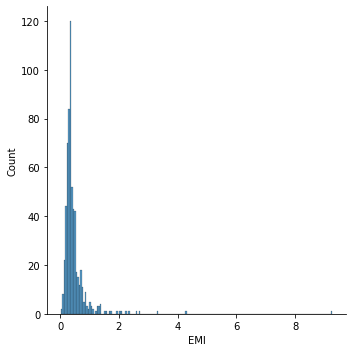

In [273]:
sns.displot(train['EMI'])

In [274]:
# samp = train.drop(['Loan_ID','Gender','Married','Education','Property_Area','Self_Employed'], axis=1)
# plt.figure(figsize=(16,5))
# sns.heatmap(samp.corr(),annot=True)
# plt.title('Correlation Matrix (for Loan Status)')

From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.


## Final dataframe

In [275]:
# train = train.drop(['LoanAmount_log','Total_Income','Total_Income_log','EMI'], axis=1)
# len(train.columns)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0,8.505323,0.333333
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0,8.699515,0.391667


### Comparison between Property Area for getting the Loan:

In [276]:
# TBD


### Prep: Let's replace the Variable values to Numerical form & display the Value Counts
#### The data in Numerical form avoids disturbances in building the model.

In [277]:
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

In [278]:
train['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [279]:
train.Gender = train.Gender.map({'Male':1, 'Female':0})
train['Gender'].value_counts()

Gender
1    502
0    112
Name: count, dtype: int64

In [280]:
train.Married=train.Married.map({'Yes':1,'No':0})
train['Married'].value_counts()

Married
1    401
0    213
Name: count, dtype: int64

In [281]:
train.Dependents=train.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
train['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [282]:

train.Education=train.Education.map({'Graduate':1,'Not Graduate':0})
# train['Education'].value_counts()

train.Self_Employed=train.Self_Employed.map({'Yes':1,'No':0})
# train['Self_Employed'].value_counts()

train.Property_Area=train.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
train['Property_Area'].value_counts()

train['LoanAmount'].value_counts()

train['Loan_Amount_Term'].value_counts()
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1,4.852030,5849.0,8.674026,0.355556
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0,8.714568,0.355556
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368,0.183333
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323,0.333333
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515,0.391667


In [283]:
# train1 = train.drop(['Loan_ID'],axis=1) 
# plt.figure(figsize=(16,5))
# sns.heatmap(train1.corr(),annot=True)
# plt.title('Correlation Matrix (for Loan Status)')

In [284]:
train = train.drop(['LoanAmount_log','Total_Income','Total_Income_log','EMI'], axis=1)


Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

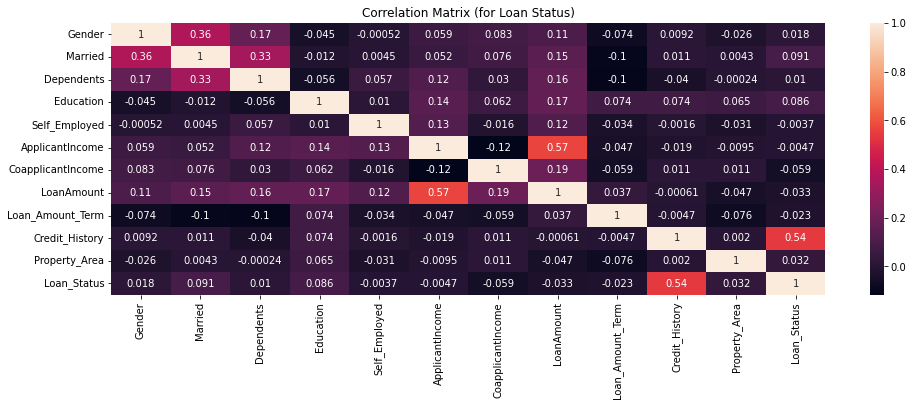

In [285]:
train1 = train.drop(['Loan_ID'],axis=1) 
plt.figure(figsize=(16,5))
sns.heatmap(train1.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

# Model Training and Evaluation
# As this is a classification problem so we will be using these models : 

KNeighborsClassifiers
RandomForestClassifiers
Support Vector Classifiers (SVC)
Logistics Regression
To predict the accuracy we will use the accuracy score function from scikit-learn library.

In [288]:
# pip install scikit-learn

### Importing Packages for Classification algorithms


In [300]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [298]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [303]:
X = train.iloc[1:,1:12].values
y = train.iloc[1:,12].values

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [307]:
y_train

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,

### Logistic Regression (LR)

In [308]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.7934782608695652


### SVM

In [312]:
model = svm.SVC()
model.fit(X_train,y_train)

svc_prediction = model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction,y_test))

SVM accuracy =  0.6956521739130435


### Decision Tree

In [315]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

dt_prediction = model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(dt_prediction,y_test))

Decision Tree accuracy =  0.6521739130434783


### K -NN

In [316]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

knn_prediction = model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(knn_prediction,y_test))

KNN accuracy =  0.6358695652173914


CONCLUSION:

The Logistic Regression algorithm gives us the maximum Accuracy (79% approx) compared to the other 3 Machine Learning Classification Algorithms